In [2]:
# edge detection using canny eddge detection algorithm
# this  algorithm is based on grayscale image, so before processing any image make sure it is an gray scale image

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
img = cv2.imread('img.jpg')

In [5]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [7]:
np.shape(gray_img)

(225, 401)

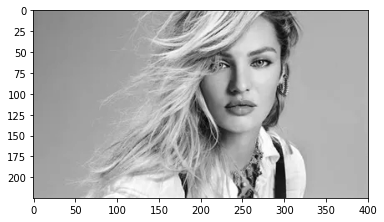

In [8]:
plt.imshow(gray_img,cmap='gray')
plt.show()

In [12]:
def Canny_detector(img,weak_th=None,strong_th=None):
    # noice reduction of image
    img=cv2.GaussianBlur(img,(5,5),1.4)
    
    # calculating the gradient
    gx=cv2.Sobel(np.float32(img),cv2.CV_64F,1,0,3)
    gy=cv2.Sobel(np.float32(img),cv2.CV_64F,0,1,3)
    
    # connvertion of cartesian coordinate to polar
    mag,ang=cv2.cartToPolar(gx,gy,angleInDegrees=True)
    
    # setting up maximum and minimum threshold
    # for double thresholding
    max_mag=np.max(mag)
    if not weak_th:weak_th=max_mag*0.1
    if not strong_th:strong_th=max_mag*0.5
    
    # getting the dimentions of input image
    height,width = img.shape
    
    # looping through every pixel
    for i_x in range(width):
        for i_y in range(height):
            
            grad_ang=ang[i_y,i_x]
            grad_ang=abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
            
            # seleccting the neighbours of target pixel
            
            # in x axis direction 
            if grad_ang<=22.5:
                neighb_1_x,neighb_1_y=i_x-1,i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
                
            # top-right (digonal 1 ) direction
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
                
            # In y-axis direction
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            # top left (diagonal-2) direction
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            # Now it restarts the cycle
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
               
            # Non-maximum suppression step
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0
                    
    weak_ids=np.zeros_like(img)
    strong_ids=np.zeros_like(img)
    ids=np.zeros_like(img)
    
    
    # double thresholding steps
    for i_x in range(width):
        for i_y in range(height):
            grad_mag=mag[i_y,i_x]
            
            if grad_mag<weak_th:
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2
                
    return mag
                
        

In [13]:
canny_img=Canny_detector(gray_img)

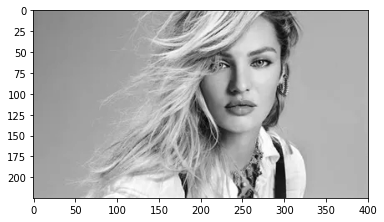

In [17]:
plt.imshow(gray_img,cmap='gray')
plt.show()

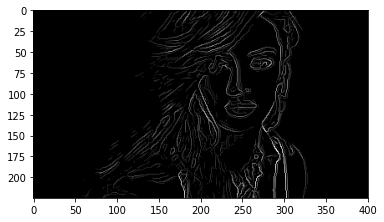

In [18]:
plt.imshow(canny_img,cmap='gray')
plt.show()